In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Elementy algebry liniowej (trochę przypomnienie)

Wektory

In [3]:
# wektory
n=2
# wektor zerowy
v=np.zeros(n)
print(v)

# zdefiniowanie wektora przez podanie współczynników
v=np.array([1,2])
print("v=",v)

# wektory możemy mnożyć przez skalary
print("5*v=",5*v)

# wektory możemy do siebie dodawać
w=np.array([2,0])
print("v+w=",v+w)


# iloczyn skalarny <v,x>=v_1x_1+\ldots+v_nx_n, oznaczam też jako v^Tx
print("<v,w>=",np.dot(v,w))
# normę (odległość od zera z tw. pitagorasa) to (v_1^2+..+v_n^2)^0.5
norm = np.linalg.norm(v)
norm = np.sum(v**2) ** 0.5
norm = np.dot(v,v)**0.5

# odległość wektorów v,w to
print("odległość v od w=",np.linalg.norm(v-w))

[0. 0.]
v= [1 2]
5*v= [ 5 10]
v+w= [3 2]
<v,w>= 2
odległość v od w= 2.23606797749979


In [5]:
# połącznie dwóch wektorów
z=np.concatenate((v,w))
print("z=",z)

# odwołanie się do którejś współrzędnej
# numerujemy od zera
print("z[0]=",z[0])


z= [1 2 2 0]
z[0]= 1


## Własności iloczynu skalarnego:
* $\langle x,x\rangle \geq 0$ i równy zero tylko jak $v=0$
* $\langle x,y \rangle=\langle y,x \rangle$
* $\langle t x,y \rangle=t \langle x,y \rangle$
* $\langle x,y+z \rangle=\langle x,y \rangle+\langle  x,z \rangle$

Norma (odległość od zera jest definiowana):
$$
\|x\|=\sqrt{\langle x,x\rangle}
$$

TWIERDZENIE. Norma spełnia nierówność trójkąta:
$$
\|x+y\| \leq \|x\|+\|y\|.
$$

Nierówność Cauchy'ego: $\langle x,y \rangle \leq \|x\| \cdot \|y\|$. Wiemy, że $\langle x+t y, x+ty \rangle \geq 0$, to znaczy, że $\Delta \leq 0$, ale $\Delta=\langle x,y \rangle^2-\|x\|^2 \|y\|^2$.

Cosinus (mierzy współliniowość):
$$
cos(v,w)=\frac{\langle v,w \rangle}{\|x\| \|y\|} \in [-1,1]
$$
Pozwala zdefiniować kąt między wektorami.
Podobieństwo cosinusowe, to moduł, jest jeden jak współliniowe.

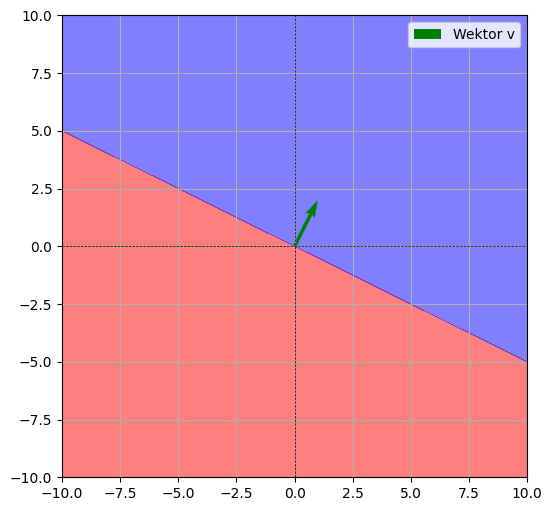

In [ ]:

def visualize_halfspace(v):
    """
    Wizualizuje obszar {x : v^T x > 0} na płaszczyźnie.
    """

    # Tworzenie siatki punktów na płaszczyźnie
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    xx, yy = np.meshgrid(x, y)

    # Obliczanie wartości v^T x dla każdego punktu na siatce
    zz = v[0] * xx + v[1] * yy

    # Wizualizacja
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['red', 'blue'], alpha=0.5)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Wektor v na wykresie
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='green', label='Wektor v')

    plt.legend()
    plt.grid()
    plt.show()

# Przykładowe użycie
v = [1, 2]  # Wektor definiujący obszar
visualize_halfspace(v)


**Macierze**

Macierz $[a_{ij}]_{i=1..n,j=1..m}$.

Przykład macierzy $2 \times 3$:
$$
A=\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23}
\end{bmatrix}
$$

Podstawowe typy macierzy:
* macierz kwadratowa, czyli o wymiarach $n \times n$
* wektor poziomy, czyli macierz o wymiarach $1 \times n$
* wektor pionowy, czyli macierz o wymiarach $n \times 1$

Operacje na macierzach
*   można mnozyć przez skalary
*   można dodawać macierze o tym samym wymiarze
* można mnożyć jeżeli się zgdzają odpowiednie wymiary (środkowy), czyli
$$
macierz(k \times l) \cdot macierz(l \times n)
$$



In [7]:
x = np.array([1,2,3]) # tablica jednowymiarowa
A = np.array([[1,2,3] , [4,5,6]]) # tablica dwuwymiarowa
B = np.array( [[[1,1,1],[1,1,1]], [[2,2,2],[2,2,2]]]) # wielowymiarowa

print(x)
print("\n \n")
print(A)
print("\n \n")
print(B)

[1 2 3]

 

[[1 2 3]
 [4 5 6]]

 

[[[1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]]]


Przy tworzeniu tablicy istnieje możliwość zadeklarowania jej typu:

In [ ]:
z = np.array( [[1,0], [0,1]], dtype=complex) # tablica liczb zespolonych
print(z)

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


Do tworzenia tablicy jednowymiarowej (wektora) składającego się z elementów z danego zakresu używamy polecenia **arange(start, stop, krok)**:

In [ ]:
print(np.arange(10), end='\n \n')
print(np.arange(0, 10, 2), end='\n \n')
print(np.arange(0., 10, 0.5))

[0 1 2 3 4 5 6 7 8 9]
 
[0 2 4 6 8]
 
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


Jeśli chcemy wygenerować tablicę o określonej liczbie z danego przedziału, używamy funkcji **linspace**:

In [ ]:
print(np.linspace(0., 10., 3.), end='\n \n')
print(np.linspace(0., 1, 5) )

[ 0.  5. 10.]
 
[0.   0.25 0.5  0.75 1.  ]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


Biblioteka Numpy oferuje wiele możliwości budowania typowych tablic:

In [9]:
print(np.ones((3,3)), '\n') # dwuwymiarowa tablica (3x3) wypełniona jedynkami
print(np.zeros((3,2)), '\n') # dwuwymiarowa tablica (3x2) wypełniona zerami
print(np.eye(4)) # macierz jednostkowa 4x4

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0.]
 [0. 0.]
 [0. 0.]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Korzystając z powyższych funkcji możemy w łatwy sposób tworzyć dowolne macierze, zmieniając ich rozmiary.

In [ ]:
print(np.arange(15).reshape(5,3), '\n')
print(np.linspace(0., 1, 15).reshape(5,3))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]] 

[[0.         0.07142857 0.14285714]
 [0.21428571 0.28571429 0.35714286]
 [0.42857143 0.5        0.57142857]
 [0.64285714 0.71428571 0.78571429]
 [0.85714286 0.92857143 1.        ]]


# Operacje na indeksach tablicy
Żeby odwołać się do konkretnej wartości tablicy należy użyć **[]** z odpowiednim indeksem (pamiętamy, że w Pythonie zaczynamy indeksować od 0).

In [ ]:
x = np.arange(15)
print(x, '\n')
print(x[3], '\n')

A = np.arange(20).reshape(5,4)
print(A, '\n')
print(A[2, 3])
print(A[2][3], '\n') # równoważnie
print(A[2], '\n') # trzeci wiersz
print(A[:, 2]) # trzecia kolumna

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

3 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

11
11 

[ 8  9 10 11] 

[ 2  6 10 14 18]


Aby wyświetlić fragment tablicy od  $n-1$  do  $m-1$  elementów używamy składni: **tablica[n:m]**, analogicznie aby wyświetlić elementy tablicy pomiędzy  $n-1$ , a  $m-1$  przesuwając się o wartość  $k$  używamy składni **tablica[n:m:k]**.


In [ ]:
x = np.arange(15)
print(x, '\n')
print(x[3:11])
print(x[3:11:2], '\n')

A = np.arange(20).reshape(5,4)
print(A[2:4], '\n') # wiersze od trzeciego do czwartego
print(A[:,2:4], '\n') # trzecia i czwarta kolumnę
print(A[:,[2,3]]) # równoważnie

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

[ 3  4  5  6  7  8  9 10]
[3 5 7 9] 

[[ 8  9 10 11]
 [12 13 14 15]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]]


Jak widać z powyższych przykładów, przecinek w nawiasach **[]** rozdziela poszczególne wymiary tablic.

In [ ]:
print(A[1,1:5], '\n') # elementy z drugiego wiersza i od drugiej do piątej kolumny
print(A[1:3, :2], '\n') # elementy od drugiego do trzeciego wiersza,
                 # znajdujące się w kolumnach od pierwszej do drugiej
print(A[1,0:5:2]) # elementy drugiego wiersza i kolumny od pierwszej do piątej co dwie

[5 6 7] 

[[4 5]
 [8 9]] 

[4 6]


Tablice można też budować w oparciu o już istniejące:

In [ ]:
A = np.arange(20).reshape(5,4)
print(A, '\n')

B = A[2:4, 2:]
print(B)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[10 11]
 [14 15]]


# Zmiana rozmiaru, kształtu tablicy
Do zmiany rozmiaru tablicy już utworzonej służy funkcja: reshape. Operacja ta nie zmieni zawartości oryginalnej tablicy, pokaże jedynie jej elementy w zadanej postaci.

In [ ]:
A = np.arange(8)
print(A,'\n')
print(A.reshape((2, 4)), '\n')
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]] 

[0 1 2 3 4 5 6 7]


Aby zmienić kształt tablicy za pomocą funkcji reshape możemy zrobić tak:

In [ ]:
A = np.arange(8)
print(A,'\n')
A = A.reshape((2, 4))
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]]


lub użyć funkcję **resize**:

In [ ]:
A = np.arange(8)
print(A,'\n')
A.resize(2, 4)
# print A.resize(2, 4), '\n'
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]]


Do sprawdzenia wymiaru tablicy służy funkcja **shape**:

In [ ]:
A = np.arange(20).reshape(5,4)
print(A.shape, '\n') # wymiar tablicy
print(A.shape[0], '\n') # pierwszy wymiar
print(A.shape[1], '\n') # drugi wymiar
print(A.size) # liczba wszystkich elementów w tablicy

(5, 4) 

5 

4 

20


Transpozycja macierzy:

In [ ]:
A = np.arange(8).reshape(2,4)
print(A, '\n')
print(A.T, '\n')
print(np.transpose(A))

[[0 1 2 3]
 [4 5 6 7]] 

[[0 4]
 [1 5]
 [2 6]
 [3 7]] 

[[0 4]
 [1 5]
 [2 6]
 [3 7]]


Podobnie jak przy funkcji reshape aby zachować wynik transpozycji macierzy musimy go przypisać do nowej zmiennej.

In [ ]:
print(A, '\n')
A = A.T
print(A)

[[0 1 2 3]
 [4 5 6 7]] 

[[0 4]
 [1 5]
 [2 6]
 [3 7]]


Podobnie jest z poleceniem **swapaxes(tablica, oś1, oś2)**, które wyświetli zmienione wiersze z kolumnami dla tablicy dwuwymiarowej. Dla wielowymiarowych tablic zmieni ono elementy dla zadanych osi.

In [ ]:
x = np.array([[1,2,3]])
print(x, '\n')
print(np.swapaxes(x,0,1), '\n')

x = np.array([[[0,1],[2,3]],[[4,5],[6,7]]])
print(x, '\n')
print(np.swapaxes(x, 0, 2))

[[1 2 3]] 

[[1]
 [2]
 [3]] 

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]] 

[[[0 4]
  [2 6]]

 [[1 5]
  [3 7]]]


Aby zmienić tablicę na jednowymiarową, możemy użyć polecenia:

In [ ]:
A = np.arange(8).reshape(2,4)
print(A, '\n')
print(np.ravel(A), '\n')
print(A.reshape(-1,))

[[0 1 2 3]
 [4 5 6 7]] 

[0 1 2 3 4 5 6 7] 

[0 1 2 3 4 5 6 7]


# Podstawowe operacje na tablicach

  * dodawanie:

In [ ]:
x = np.array([1,4,6,2,5])
v = np.arange(5)
print(x+v)
print(np.add(x, v), '\n') # równoważnie
print(x+1, '\n')

A = np.arange(15, 30).reshape((5, 3))
B = np.arange(15).reshape((5, 3))
print(A+B)
print(np.add(A, B), '\n')
print(A+5, '\n')

x = np.array([1,2,3])
print(A, '\n')
print(x, '\n')
print(np.add(A, x)) # dodawanie do każdego wiersza wektora x

[1 5 8 5 9]
[1 5 8 5 9] 

[2 5 7 3 6] 

[[15 17 19]
 [21 23 25]
 [27 29 31]
 [33 35 37]
 [39 41 43]]
[[15 17 19]
 [21 23 25]
 [27 29 31]
 [33 35 37]
 [39 41 43]] 

[[20 21 22]
 [23 24 25]
 [26 27 28]
 [29 30 31]
 [32 33 34]] 

[[15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]] 

[1 2 3] 

[[16 18 20]
 [19 21 23]
 [22 24 26]
 [25 27 29]
 [28 30 32]]


* odejmowanie:

In [ ]:
x = np.array([1,4,6,2,5])
v = np.arange(5)
print(x-v)
print(np.subtract(x, v), '\n') # równoważnie
print(x-1)

A = np.arange(15, 30).reshape((5, 3))
B = np.arange(15).reshape((5, 3))
print(A-B)
print(np.subtract(A, B), '\n')
print(A-1, '\n')

x = np.array([1,2,3])
print(np.subtract(A, x)) # odjęcie od każdego wiersza wektora x

[ 1  3  4 -1  1]
[ 1  3  4 -1  1] 

[0 3 5 1 4]
[[15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]]
[[15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]] 

[[14 15 16]
 [17 18 19]
 [20 21 22]
 [23 24 25]
 [26 27 28]] 

[[14 14 14]
 [17 17 17]
 [20 20 20]
 [23 23 23]
 [26 26 26]]


* mnożenie:

In [ ]:
x = np.array([1,4,6,2,5])
v = np.arange(5)
print(x*5, '\n')
print(np.dot(x,v), '\n') # iloczyn skalarny
print(x*v, '\n' )# to nie, mnożony jest element przez element!

A = np.array([[1, 3], [0, 6]])
print(A*5, '\n')

B = np.array([[-2, 6], [8, -2]])
print(np.dot(A, B), '\n')
print(A*B) # to nie, mnożony jest element przez element!

[ 5 20 30 10 25] 

42 

[ 0  4 12  6 20] 

[[ 5 15]
 [ 0 30]] 

[[ 22   0]
 [ 48 -12]] 

[[ -2  18]
 [  0 -12]]


NumPy ma możliwość deklarowania macierzy, różnią się one w tym środowisku od tablic tym, że operacja mnożenia nie dotyczy mnożenia elementów, tylko klasycznego mnożenia macierzy:

In [ ]:
A = np.matrix( ((2,3), (3, 5)) )
B = np.matrix( ((1,2), (5, -1)) )

print(A * B, '\n')
print(np.dot(A, B))

[[17  1]
 [28  1]] 

[[17  1]
 [28  1]]


  * potęgowanie:

In [ ]:
x = np.array([1,4,6,2,5])
print(x, '\n')

print(x**2)
print(np.power(x, 2), '\n') # równoważnie

A = np.arange(9).reshape((3, 3))
print(A, '\n')
print(A**2, '\n') # kwadrat elementów tablicy
print(np.power(A, 2)) # równoważnie

[1 4 6 2 5] 

[ 1 16 36  4 25]
[ 1 16 36  4 25] 

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]] 

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]


Więcej funkcji można znaleźć tutaj: [https://docs.scipy.org/doc/numpy/reference/routines.math.html].

## Porównania elementów tablic

In [ ]:
A = np.arange(5, 20).reshape((5, 3))
B = np.arange(15).reshape((5, 3))

print(A < B, '\n')
print(A == A, '\n')
print(A == 17, '\n')
print(np.any( A > 17 ), '\n') # prawdziwe, jeśli każdy element z osobna spełnia warunek
print(np.all( A > 17 )) # prawdziwe jeśli wszystkie elementy spełniają warunek

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]] 

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]] 

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [ True False False]] 

True 

False


## Łączenie i dzielenie tablic
Biblioteka <i>NumPy</i> daje nam narzędzia dzięki, którym możemy łączyć i dzielić tablice. Zaczniemy od omówienia problemu łączenia tablic:

In [ ]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6]])

print(x, '\n')
print(y, '\n')

# łączenie wierszowe
print(np.concatenate((x, y), axis=0), '\n')
print(np.vstack((x,y)), '\n')

# łączenie kolumnowe
print(np.concatenate((x,y.T), axis=1), '\n')
print(np.hstack((x,y.T)))

[[1 2]
 [3 4]] 

[[5 6]] 

[[1 2]
 [3 4]
 [5 6]] 

[[1 2]
 [3 4]
 [5 6]] 

[[1 2 5]
 [3 4 6]] 

[[1 2 5]
 [3 4 6]]


## Wybrane metody z algebry linowej
Do części funkcji typowych dla algebry liniowej możemy się odwołać po zaimportowaniu biblioteki **linalg** będącej integralną częścią biblioteki NumPy.

In [ ]:
import numpy.linalg as alg

Można tam znaleźć funkcję obliczającą:

* macierz odwrotną:

In [ ]:
A = np.array([[1., 2.], [3., 4.]])
invA = alg.inv(A)
print(invA, '\n')
print(np.dot(A, invA))

[[-2.   1. ]
 [ 1.5 -0.5]] 

[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


macierz transponowana - zamieniamy wiersze z kolumnami:

In [ ]:
A=np.arange(12).reshape((2,6))

print(A)
print(A.T)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[ 0  6]
 [ 1  7]
 [ 2  8]
 [ 3  9]
 [ 4 10]
 [ 5 11]]


  * wyznacznik:

In [ ]:
print(A, '\n')
print(alg.det(A))

[[1. 2.]
 [3. 4.]] 

-2.0000000000000004


  * ślad:

In [ ]:
print(A, '\n')
print(np.trace(A))

[[1. 2.]
 [3. 4.]] 

5.0


  * normę dla macierz lub wektora:

In [ ]:
print(alg.norm(A), '\n') # Euklidesowa
print(alg.norm(A, 'fro'), '\n') # Frobeniusa
print(alg.norm(A, np.inf), '\n') # maksimum

print(alg.norm(A, axis=0), '\n') # wierszy
print(alg.norm(A, axis=1), '\n') # kolumn

5.477225575051661 

5.477225575051661 

7.0 

[3.16227766 4.47213595] 

[2.23606798 5.        ] 



  * rozwiązywanie układów równań:

In [ ]:
# 4*x_1 + x_2 = 10
# 3*x_1 = 7
A = np.array([[4,1], [3,0]])
b = np.array([10,7])
print(np.linalg.solve(A, b))

[2.33333333 0.66666667]


### Algorytm mnożenia macierzy

Załóżmy, że mamy dwie macierze:  
- $A$ o wymiarach $m \times n$  
- $B$ o wymiarach $n \times p$.  

**Warunek:** Mnożenie jest możliwe, jeśli liczba kolumn w $ A $ (czyli $ n $) jest równa liczbie wierszy w $ B $.

Wynik mnożenia $ C = A \cdot B $ to macierz $ C $ o wymiarach $ m \times p $. Element $ c_{ij} $ w macierzy $ C $ oblicza się według wzoru:

$
c_{ij} = \sum_{k=1}^{n} a_{ik} \cdot b_{kj}
$

Oznacza to, że każdy element $ c_{ij} $ jest sumą iloczynów odpowiednich elementów z $ i $-tego wiersza macierzy $ A $ i $ j $-tej kolumny macierzy $ B $.

---

### Algorytm krok po kroku

1. **Inicjalizacja:** Utwórz pustą macierz $ C $ o wymiarach $ m \times p $.
2. **Iteracja po wierszach i kolumnach:**  
   Dla każdego wiersza $ i $ w $ A $ i każdej kolumny $ j $ w $ B $:
   - Oblicz $ c_{ij} $ jako sumę iloczynów $ a_{ik} \cdot b_{kj} $, gdzie $ k $ iteruje od 1 do $ n $.
3. **Zapisanie wyników:** Wypełnij macierz $ C $ obliczonymi wartościami.

---

### Przykład
Dane macierze:  
$
A =
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}, \quad
B =
\begin{bmatrix}
5 & 6 \\
7 & 8
\end{bmatrix}
$

Obliczamy elementy $ C $:  
$
c_{11} = (1 \cdot 5) + (2 \cdot 7) = 19, \quad c_{12} = (1 \cdot 6) + (2 \cdot 8) = 22
$  
$
c_{21} = (3 \cdot 5) + (4 \cdot 7) = 43, \quad c_{22} = (3 \cdot 6) + (4 \cdot 8) = 50
$

Wynik:  
$
C =
\begin{bmatrix}
19 & 22 \\
43 & 50
\end{bmatrix}
$

---

### Złożoność obliczeniowa

Algorytm ma trzy główne pętle:
1. Po $ m $ wierszach macierzy $ A $,
2. Po $ p $ kolumnach macierzy $ B $,
3. Po $ n $ elementach w wierszu $ A $ i kolumnie $ B $.

Każdy element $ c_{ij} $ wymaga $ n $ operacji mnożenia i dodawania. Łączna liczba operacji to $ m \cdot n \cdot p $.  
**Złożoność czasowa:** $ O(m \cdot n \cdot p) $.

Istnieją szybsze podejścia.

Algorytm Strassena $(O(n^{\log_2 7}) ≈ O(n^{2.81}))$
Redukuje liczbę mnożeń poprzez sprytne rozkładanie macierzy na mniejsze bloki.
Kluczowa idea: Wymaga 7 mnożeń zamiast 8 dla macierzy

W przypadku użycia GPU zrównolegla się mnożenia.

# Problem optymalnego wyboru nawiasowania dla mnożenia macierzy

## Opis problemu
Dla ciągu macierzy $A_1, A_2, \dots, A_n$, chcemy znaleźć sposób ich nawiasowania (kolejności mnożenia), który minimalizuje łączną liczbę operacji mnożenia skalarnych.

---

## Wejście
Ciąg $n$ macierzy o wymiarach:
$$
p_0 \times p_1, \, p_1 \times p_2, \, \dots, \, p_{n-1} \times p_n
$$

## Wyjście
- Minimalna liczba mnożeń skalarnych potrzebna do obliczenia iloczynu macierzy.
- Optymalna kolejność nawiasowania.

---

Ogólnie problem trudny do rozwiązania bez sprawdzania wszystkich możliwości (użycie programowania dynamicznego).

Natomias jeżeli $A_1$ jest wektorem poziomym lub $A_n$ jest wektorem pionowym, to można zaproponować sensowne mnożenie (niekoniecznie optymalne).

**Zadanie**
Zaproponuj rozwiązanie, i wylicz ile operacji wymaga.



In [ ]:
# macierze
A=np.array([[1,2],[2,3],[0,1]])
print(A)
#macierz transponowana
print(A.T)

# mnożenie macierzowe
print(A@A.T)

#wektor poziomy
v=np.array([[1,2]])
print(v)

#wektor piopnowy (dla mnie domyślny)
w=np.array([[-1],[1]])
print(w)

# iloczyn skalarny wektorów v,x inaczej (dla wektorów poziomych) to v^Tx, tu norma
print(w.T@w)
# nie do końca, bo tutaj nie jest rozumiany jako skalar


[[1 2]
 [2 3]
 [0 1]]
[[1 2 0]
 [2 3 1]]
[[ 5  8  2]
 [ 8 13  3]
 [ 2  3  1]]
[[1 2]]
[[-1]
 [ 1]]
[[2]]


## Rozwiązanie (Dynamiczne programowanie)

### Reprezentacja problemu
- Tworzymy tablicę $m[i][j]$, gdzie $m[i][j]$ oznacza minimalny koszt pomnożenia macierzy $A_i$ do $A_j$.
- Nie obliczamy rzeczywistych wyników mnożenia, tylko liczbę operacji potrzebnych do ich wykonania.

### Rekurencyjna zależność
Dla każdego podproblemu $i \leq k < j$:
$$
m[i][j] = \min_{i \leq k < j} \big( m[i][k] + m[k+1][j] + p_{i-1} \cdot p_k \cdot p_j \big)
$$
Gdzie:
- $m[i][k]$: Koszt pomnożenia macierzy od $A_i$ do $A_k$,
- $m[k+1][j]$: Koszt pomnożenia macierzy od $A_{k+1}$ do $A_j$,
- $p_{i-1} \cdot p_k \cdot p_j$: Koszt scalania dwóch wynikowych macierzy.

---

### Kroki algorytmu
1. Rozważamy podproblemy o rosnącej długości (od jednego do \(n\) macierzy).
2. Iteracyjnie wypełniamy tablicę \(m[i][j]\) dla wszystkich możliwych zakresów \(i\) do \(j\).

---

## Złożoność obliczeniowa
- Algorytm działa w czasie \(O(n^3)\), ponieważ:
  - Analizujemy wszystkie podproblemy (\(O(n^2)\)).
  - Dla każdego podproblemu obliczamy minimalny koszt spośród \(O(n)\) podziałów.


**Zadanie** Zaimplementować ten algorytm. Policzyć ręcznie dla prostych przykładów.

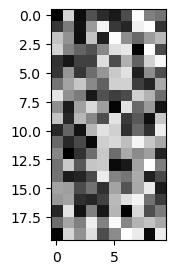

In [ ]:
# Przykładowa macierz skalarna
matrix = np.random.rand(20, 10) # Losowe wartośći z zakresu 0-1
#print(matrix)
# Wizualizacja macierzy jako obrazu
plt.figure(figsize=(3, 3))
plt.imshow(matrix, cmap='gray',interpolation='nearest')
plt.show()



## funkcje macierzowe

In [19]:
A=np.random.rand(4, 3)
B=np.random.rand(3, 5)
A.T
A@B

array([[0.88388286, 0.68661176, 0.79986077, 0.37183879, 0.45557718],
       [2.26378505, 1.71087979, 1.33397097, 1.42681574, 1.48734894],
       [1.09156137, 0.50171861, 0.71463044, 0.44935713, 0.89755009],
       [1.90682813, 1.29468385, 1.10365975, 1.13050742, 1.35573412]])

Prymitywne mnożenie macierzy wielkości $n$ to $O(n^4)$, ale za dużo. Można w $O(n^3)$.

Mnożenie macierzowe jest łączne, czyli nie zależy od nawiasów. Jak powinno się mnożyć, gdy na końcu mamy wektor poziomo.

## macierze kwadratowe: wyznacznik

dla macierzy kwadratowej $A$ bardzo ważną informację pełni wyznacznik - $det(A)$, a mianowicie moduł określa zmianę pola, a znak czy następuje lustrzane odbicie

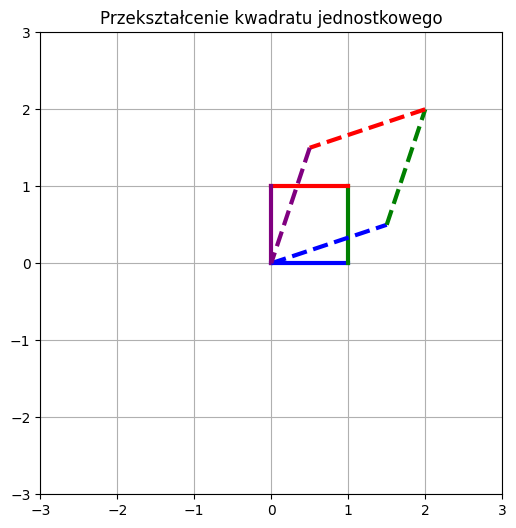

det= 1.9999999999999998


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Zdefiniuj macierz transformacji A (np. rotacja i skalowanie)
A = np.array([[1.5, 0.5],
              [0.5, 1.5]])

# Zdefiniuj wierzchołki kwadratu jednostkowego
square = np.array([[0, 0],
                   [1, 0],
                   [1, 1],
                   [0, 1]])

# Dodaj pierwszy wierzchołek, aby zamknąć kwadrat
square = np.vstack([square, square[0]])

# Zastosuj macierz transformacji na punkty kwadratu
transformed_square = square @ A.T  # Macierz A.T dla transponowanej macierzy

# Kolory dla boków (4 boki)
colors = ['blue', 'green', 'red', 'purple']

# Tworzenie wykresu
plt.figure(figsize=(6, 6))

# Rysuj oryginalny kwadrat
for i in range(4):
    plt.plot([square[i, 0], square[(i + 1) % 4, 0]],
             [square[i, 1], square[(i + 1) % 4, 1]],
             color=colors[i], linewidth=3)

# Rysuj przekształcony kwadrat
for i in range(4):
    plt.plot([transformed_square[i, 0], transformed_square[(i + 1) % 4, 0]],
             [transformed_square[i, 1], transformed_square[(i + 1) % 4, 1]],
             color=colors[i], linewidth=3, linestyle='--')

# Ustawienia osi
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Przekształcenie kwadratu jednostkowego')
plt.grid(True)

# Pokaż wykres
plt.show()
print("det=",np.linalg.det(A))

# TENSORY

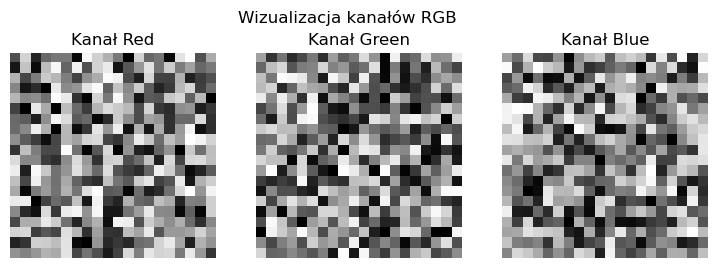

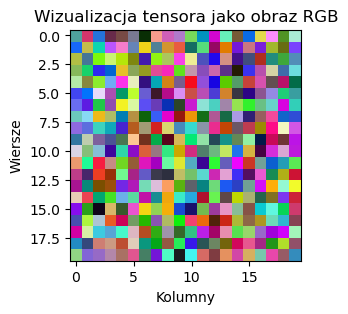

In [ ]:
# Losowy tensor 3-wymiarowy (20x20x3) dla kanałów RGB
tensor = np.random.rand(20, 20, 3)

# Wizualizacja kanałów RGB jako osobne obrazy
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
fig.suptitle("Wizualizacja kanałów RGB")
channels = ['Red', 'Green', 'Blue']
for i in range(3):
    axes[i].imshow(tensor[:, :, i], cmap='gray', interpolation='nearest')
    axes[i].set_title(f"Kanał {channels[i]}")
    axes[i].axis('off')
plt.show()

# Wizualizacja tensora jako obraz RGB
plt.figure(figsize=(3, 3))
plt.imshow(tensor, interpolation='nearest')
plt.title("Wizualizacja tensora jako obraz RGB")
plt.xlabel("Kolumny")
plt.ylabel("Wiersze")
plt.show()

Tensory

MUZYKA - tensor 1 wymiarowy (jeżeli jedno pasmo), jak stereo to 2 wymiary

OBRAZY HIPERSPEKTRALNE (tensory 3 wymiarowa, ale ostatni ma więcej niż 3)
https://en.wikipedia.org/wiki/Hyperspectral_imaging

FILMY -- TENSOR 4 WYMIAROWY (4 wymiar to czas)

FILMY 3D (TOMOGRAFIA KOMPUTEROWA) TENSOR 5 WYMIAROWY



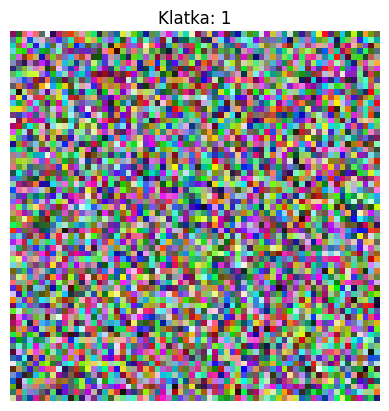

In [ ]:
# pip install ffmpeg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Tworzymy przykładowy tensor o wymiarach (czas, wysokość, szerokość, RGB)
# widzimy, że tensor czterowymiarowy
tensor = np.random.rand(50, 64, 64, 3)  # 50 klatek, 64x64 piksele, 3 kanały RGB

# Tworzymy figurę do wizualizacji
fig, ax = plt.subplots()

# Funkcja do wyświetlania klatki
def update(frame):
    ax.clear()  # Czyszczenie poprzedniego obrazu
    ax.imshow(tensor[frame])  # Pokazujemy obraz z odpowiedniej klatki
    ax.set_title(f"Klatka: {frame+1}")  # Tytuł z numerem klatki
    ax.axis('off')  # Ukrycie osi

# Tworzymy animację
ani = animation.FuncAnimation(fig, update, frames=range(tensor.shape[0]), interval=100, repeat=False)

# Zapisujemy animację do pliku MP4
ani.save('animation.mp4', writer='ffmpeg', fps=10)
